# AI Predictive Maintenance for Machines

# 기계를 위한 AI 예측 유지보수

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.- AI가 항공기의 센서 데이터를 사용하여 유지 관리가 필요한 센서를 예측하는 방법을 연구합니다.

## Context

우리는 [Github](https://github.com/Samimust/predictive-maintenance/tree/master/data)에서 얻은 항공기 센서 데이터를 사용합니다. csv 파일에는 Microsoft에서 제공하는 시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 엔진의 성능 저하 패턴이 센서 측정에 반영된다고 가정합니다.

## Use Python to open csv files

[scikit-learn](https://scikit-learn.org/stable/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/)를 사용하여 데이터 세트를 작업합니다. Scikit-learn은 예측 데이터 분석을 위한 효율적인 도구를 제공하는 매우 유용한 기계 학습 라이브러리입니다. Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다. Matplotlib은 고품질의 데이터 시각화를 위한 Python의 2차원 그래프 라이브러리입니다. 코드 몇 줄만으로 간단하게 복잡한 그래프를 만들 수 있어서 사용성이 매우 높습니다.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import metrics 

### Data 설명

In [2]:
# Train 데이터 불러오기
df_train = pd.read_csv(r'[Dataset]_Module11_Train_(Maintenance).csv')


데이터 세트에는 시뮬레이션된  시뮬레이션된 항공기 엔진 고장 이벤트, 작동 설정 및 21개 센서 측정값이 포함되어 있습니다. 이제 그 Data를 실제로 보도록 하겠습니다.

## Task1: 첫 10개 행을 출력하여 train 데이터 탐색하기

In [3]:
# your cod ehere
df_train.head(10)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,0.025727,0.0,1.140175,0.0,0.0,0.051186,0.031436,186,0,0
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,0.023476,0.0,1.140175,0.0,0.0,0.086718,0.021634,185,0,0
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,0.022477,0.0,0.836660,0.0,0.0,0.086487,0.034405,184,0,0
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,0.020740,0.0,0.836660,0.0,0.0,0.077136,0.038939,183,0,0
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,0.020493,0.0,0.836660,0.0,0.0,0.062849,0.058103,182,0,0


In [4]:
# test 데이터 불러오기
df_test = pd.read_csv(r'[Dataset]_Module11_Test_(Maintenance).csv')
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,0.021174,0.0,0.707107,0.0,0.0,0.124016,0.025037,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,0.011429,0.0,1.095445,0.0,0.0,0.069785,0.027820,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,0.030924,0.0,0.836660,0.0,0.0,0.143631,0.018966,69,0,0
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,0.021249,0.0,1.341641,0.0,0.0,0.126372,0.021106,82,0,0
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,0.009627,0.0,0.547723,0.0,0.0,0.091924,0.101100,91,0,0


## Task 2: describe 함수를 사용하여 train과 test data set 에 대한 정보 가져오기

In [5]:
# your code here
df_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,0.018802,0.0,0.885173,0.0,0.0,0.094636,0.056483,107.807862,0.150259,0.227813
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.007103,0.0,0.341989,0.0,0.0,0.034867,0.020669,68.880990,0.357334,0.575358
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,0.013724,0.0,0.547723,0.0,0.0,0.070071,0.041825,51.000000,0.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,0.018365,0.0,0.836660,0.0,0.0,0.092736,0.055555,103.000000,0.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,0.023380,0.0,1.140175,0.0,0.0,0.117132,0.069839,155.000000,0.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,0.065761,0.0,2.828427,0.0,0.0,0.325269,0.187313,361.000000,1.000000,2.000000


In [6]:
df_test.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
count,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.000000,100.000000,100.000000,1.000000e+02,...,100.000000,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,130.960000,-0.000073,0.000022,100.0,518.67,642.768400,1591.824700,1410.548200,1.462000e+01,...,0.019207,0.0,0.889000,0.0,0.0,0.093899,0.057975,75.52000,0.250000,0.350000
std,29.011492,53.593479,0.002353,0.000306,0.0,0.00,0.444592,6.646293,8.626344,1.785306e-15,...,0.008033,0.0,0.307613,0.0,0.0,0.035885,0.020325,41.76497,0.435194,0.657129
min,1.000000,31.000000,-0.005900,-0.000500,100.0,518.67,641.750000,1576.930000,1389.330000,1.462000e+01,...,0.004287,0.0,0.000000,0.0,0.0,0.015166,0.018966,7.00000,0.000000,0.000000
25%,25.750000,88.750000,-0.001650,-0.000300,100.0,518.67,642.490000,1587.007500,1403.912500,1.462000e+01,...,0.013697,0.0,0.707107,0.0,0.0,0.070107,0.042731,32.75000,0.000000,0.000000
50%,50.500000,133.500000,-0.000250,0.000100,100.0,518.67,642.775000,1591.365000,1410.300000,1.462000e+01,...,0.018009,0.0,0.836660,0.0,0.0,0.088544,0.055796,86.00000,0.000000,0.000000
75%,75.250000,164.250000,0.001300,0.000300,100.0,518.67,643.025000,1597.280000,1416.922500,1.462000e+01,...,0.023288,0.0,1.140175,0.0,0.0,0.114105,0.072792,112.25000,0.250000,0.250000
max,100.000000,303.000000,0.007600,0.000500,100.0,518.67,644.030000,1607.550000,1428.420000,1.462000e+01,...,0.049270,0.0,1.483240,0.0,0.0,0.187216,0.115700,145.00000,1.000000,2.000000


In [13]:
# 누락된 값 확인
df_train.isnull().sum()

id           0
cycle        0
setting1     0
setting2     0
setting3     0
            ..
sd20         0
sd21         0
ttf          0
label_bnc    0
label_mcc    0
Length: 71, dtype: int64

In [28]:
Temp = pd.DataFrame(df_train.isnull().sum())
Temp.columns = ['Sum']
# print(Temp)

print("Amount of rows with missing values : ", str(len(Temp[Temp['Sum'] > 0])))

Amount of rows with missing values :  0


## Data 시각화

데이터를 시각화하면 다양한 feature가 어떻게 분포되어 있는지에 대한 아이디어를 얻을 수 있으므로 분석에 도움이 됩니다.

In [15]:
features = []
for col in df_train.columns: 
    features.append(col)

print(features)

['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6', 'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15', 'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3', 'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12', 'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21', 'ttf', 'label_bnc', 'label_mcc']


<Axes: title={'center': 'Features Standard Deviation'}>

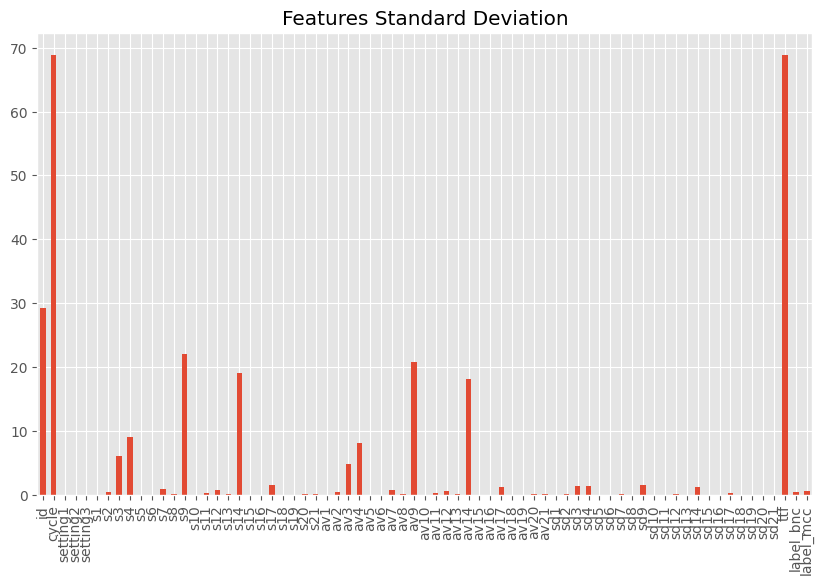

In [16]:
# 입력 feature의 표준 편차를 그려서 비교합니다:
df_train[features].std().plot(kind='bar', figsize=(10,6), title="Features Standard Deviation")

feature 간의 상관 관계를 확인합니다.

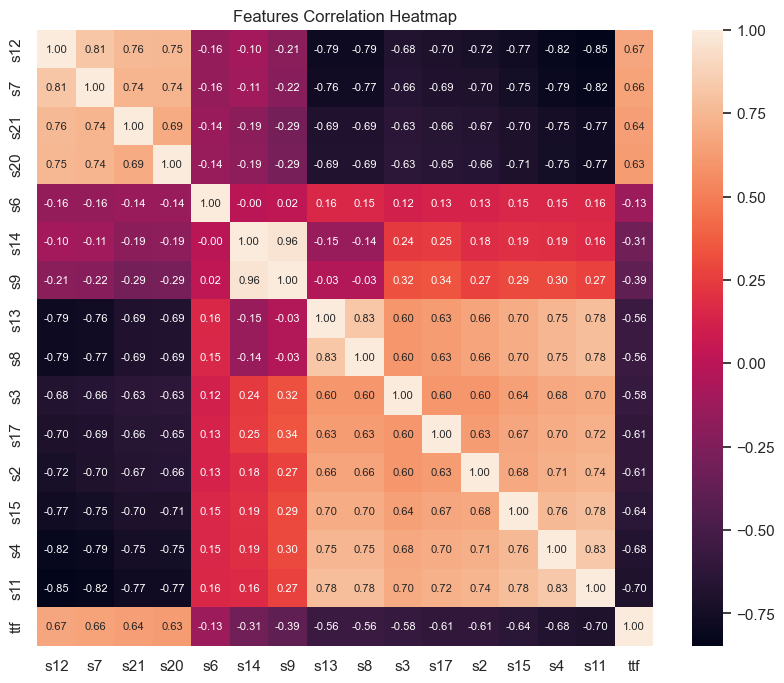

In [18]:
# 더 나은 시각화를 위해 feature의 하위 집합인 feat를 사용하여 상관관계 행렬을 그려봅니다.
feat= ['s12',
 's7',
 's21',
 's20',
 's6',
 's14',
 's9',
 's13',
 's8',
 's3',
 's17',
 's2',
 's15',
 's4',
 's11',
 'ttf']

import seaborn as sns
cm = np.corrcoef(df_train[feat].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=feat, xticklabels=feat)
plt.title('Features Correlation Heatmap')
plt.show()

In [30]:
print(len(df_train[feat].values))
print(len(df_train[feat].values.T))

20631
16


## 선형 회귀를 위한 데이터 준비

In [19]:
# 회귀 모델을 위한 데이터를 준비합시다.

# 원본 feature 리스트 입니다.
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

# 회귀 레이블과 상관 관계가 낮거나 없는 feature 리스트 입니다.
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

# 회귀 레이블과 상관 관계가 있는 feature 리스트 입니다.
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

# features는 실험할 feature 집합을 보유하는 변수입니다.
features = features_orig

In [20]:
X_train = df_train[features]
y_train = df_train['ttf']

X_test = df_test[features]
y_test = df_test['ttf']

일반 분산(Variance)과 설명된 분산(Explained Variance)은 데이터 분석과 통계학에서 중요한 개념으로, 둘 다 데이터의 변동성을 측정하는 방법이지만, 서로 다른 맥락에서 사용됩니다.

1. 일반 분산 (Variance)
- 정의: 일반 분산은 데이터 세트의 각 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 측정하는 통계량입니다. 이는 데이터의 전체 변동성을 나타냅니다.
- 계산 방법: 모든 데이터 포인트와 평균 간의 거리(편차)를 제곱한 후, 이들의 평균을 구합니다.
- 의미: 일반 분산은 데이터의 흩어짐 정도를 나타내며, 값이 클수록 데이터가 평균에서 더 멀리 흩어져 있음을 의미합니다.

2. 설명된 분산 (Explained Variance)
- 정의: 설명된 분산은 특정 모델(예: 회귀, PCA 등)이 설명할 수 있는 데이터의 변동성 부분을 나타냅니다. 전체 변동성 중에서 모델이 설명할 수 있는 비율을 측정하는 데 사용됩니다.
- 의미: 설명된 분산이 클수록, 모델이 데이터의 변동성을 더 잘 설명한다는 의미입니다.
  
차이점 요약:

일반 분산은 데이터의 전체 변동성을 측정하는 데 사용되며, 데이터가 평균으로부터 얼마나 흩어져 있는지를 나타냅니다.
설명된 분산은 특정 모델이 데이터의 변동성 중 어느 정도를 설명할 수 있는지를 나타내며, 모델의 성능을 평가하는 지표로 사용됩니다.
두 개념 모두 데이터 분석에서 중요하며, 데이터의 변동성을 이해하고, 모델의 성능을 평가하는 데 사용됩니다.

**Explained Variance 식**
<img src="evpng.png" alt="Explained Variance"/>


## Helper 함수

In [21]:
def get_regression_metrics(model, actual, predicted):
    
    """주요 회귀 지표를 계산합니다.

    인수(Args):
        model(str): 모델 이름 식별자
        actual(series): 테스트 레이블 값을 포함합니다.
        predict(series): 예측 값을 포함합니다.

    반환값(Returns):
        dataframe: 단일 데이터프레임의 결합된 지표

    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                    }

    # reg_metrics 반환
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [22]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):
    
    """회귀 계수 가중치 또는 특성 중요도를 그래프(플롯)로 그려줍니다.

    인수(Args):
    model (str): 모델 이름 식별자
    weights (array): 회귀 계수 가중치 또는 특성 중요도를 포함합니다.
    feature_names (list):  해당 특성 이름을 포함합니다.
    weights_type (str): '계수 가중치'의 경우 'c', 그렇지 않으면 '특징 중요도'

    반환값(Returns):
    회귀 계수 가중치 또는 특성 중요도의 그래프(플롯)

    """
    (px, py) = (8, 10) if len(weights) > 30 else (8, 5)
    W = pd.DataFrame({'Weights':weights}, feature_names)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'
    plt.xlabel(model + label)
    plt.gca().legend_ = None


In [23]:
def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
    
    """회귀 잔차를 인쇄합니다.

    인수(Args):
    model(str): 모델 이름 식별자
    y_train(series): 학습 레이블
    y_train_pred(series): 학습 데이터에 대한 예측
    y_test(series): 테스트 레이블
    y_test_pred(series): 테스트 데이터에 대한 예측

    반환값(Returns):
    회귀 잔차 플롯

    """
    
    plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
    plt.title(model + ' Residuals')
    plt.show()

## 선형 회귀 모델

선형 회귀는 종속 변수(출력)와 하나 이상의 독립 변수(입력) 간의 관계를 모델링하는 간단한 모델입니다.

![linear regression](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-in-machine-learning.png)

RMSE

RMSE는 평균 제곱근 오차를 나타냅니다. 기계 학습 모델을 사용하여 예측을 수행할 때 예측이 정확한지 확인해야 합니다. RMSE는 예측 오류를 측정하는 방법입니다. RMSE가 높으면 예측이 나쁘고, 낮으면 예측이 좋은 것입니다.

MAE

MAE는 평균 절대 오차를 나타냅니다. RMSE와 마찬가지로 MAE는 예측의 오류를 측정하는 방법입니다. MAE가 높으면 예측이 나쁘고 그 반대의 경우 좋은 것입니다.

In [24]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
linreg_metrics

R^2 training: 0.580, R^2 test: 0.405


,Linear Regression
Root Mean Squared Error,32.041095
Mean Absolute Error,25.591780
R^2,0.405495
Explained Variance,0.665297


## Task 3: 선형 회귀로 얻은 feature의 가중치를 그려봅니다.

In [37]:
linreg.coef_

array([ 5.11408412e+01,  1.54522207e+03,  4.85256724e-10,  6.01007022e-10,
       -6.81748786e+00, -4.40992105e-01, -7.64835065e-01, -2.22337704e-11,
       -5.10636711e+02,  6.88191782e+00, -1.32351313e+01, -3.49539135e-01,
        2.47979415e-12, -3.72126668e+01,  1.06238701e+01, -1.18640141e+01,
       -2.73807502e-01, -1.19409211e+02, -3.97421530e-23, -1.84817005e+00,
        0.00000000e+00,  0.00000000e+00,  1.98613549e+01,  4.10827545e+01])

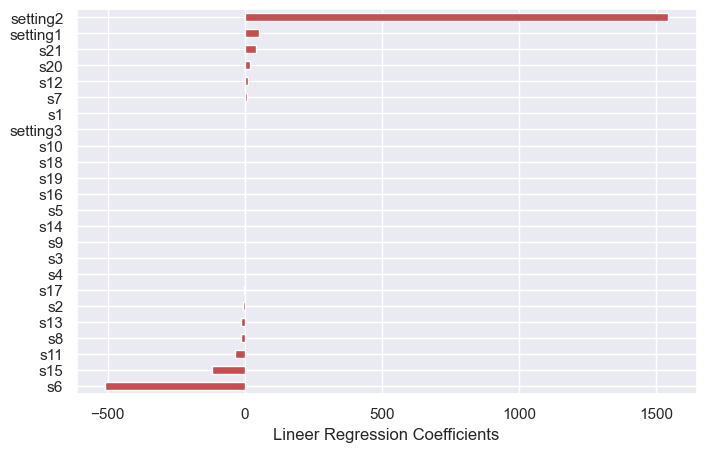

In [34]:
model = 'Lineer Regression'
weights = linreg.coef_
feature_names = X_train.columns

plot_features_weights(model, weights, feature_names, weights_type='c')

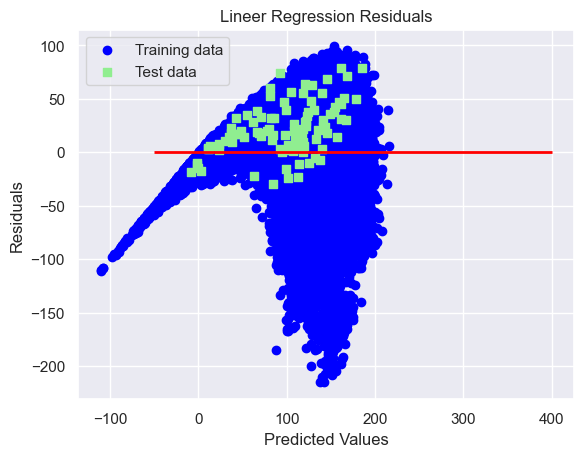

In [36]:
plot_residual(model, y_train, y_train_predict, y_test, y_test_predict)

setting2, setting1, s1, s2 등의 데이터 모델의 매개변수가 그래프에 표시되어 있습니다. setting2와 s6의 빨간색 선이 가장 긴 것을 볼 수 있습니다. 그 feature들이 가장 중요합니다.